# Sentiment Analysis Problem:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

- President Franklin D. Roosevelt in 1941
- President John F. Kennedy in 1961
- President Richard Nixon in 1973

In [1]:
#pip install wordcloud  (If Not Available to avoid errors)

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import nltk, re, string
from nltk.corpus import inaugural
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

In [3]:
#(If Not Available download the following to avoid errors)
#nltk.download('inaugral')
#nltk.download('punkt')
#nltk.download('stopwords')

## Finding the number of characters, words, and sentences for the mentioned documents.

In [4]:
inaugural.fileids()[:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [5]:
speech1 = '1941-Roosevelt.txt'
speech2 = '1961-Kennedy.txt'
speech3 = '1973-Nixon.txt'

#Number of characters

char1 = len(inaugural.raw(speech1))
char2 = len(inaugural.raw(speech2))
char3 = len(inaugural.raw(speech3))

#Number of words

words1 = len(inaugural.words(speech1))
words2 = len(inaugural.words(speech2))
words3 = len(inaugural.words(speech3))

#Number of sentences

sent1 = len(inaugural.sents(speech1))
sent2 = len(inaugural.sents(speech2))
sent3 = len(inaugural.sents(speech3))

print("Speech 1:\nCharacters: {}\nWords: {}\nSentences: {}\n\nSpeech 2:\nCharacters: {}\nWords: {}\nSentences: {}\n\nSpeech 3:\nCharacters: {}\nWords: {}\nSentences: {}\n".format(char1,words1,sent1,char2,words2,sent2,char3,words3,sent3))

Speech 1:
Characters: 7571
Words: 1536
Sentences: 68

Speech 2:
Characters: 7618
Words: 1546
Sentences: 52

Speech 3:
Characters: 9991
Words: 2028
Sentences: 69



## Removing all the stopwords from all three speeches.

In [6]:
stopwords = nltk.corpus.stopwords.words("english") + list(string.punctuation)
stopwords[:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

#### The stopwords consist of only lowercase letters hence converting the concerned documents into lowercase

In [7]:
lower = lambda x: x.lower()
lower1 = list(map(lower,inaugural.words(speech1)))
lower2 = list(map(lower,inaugural.words(speech2)))
lower3 = list(map(lower,inaugural.words(speech3)))

#### Removing stopwords and digits and the charcter "--" using RegEx

In [8]:
pattern = r'[^a-zA-z]+' 

clean_words1 = [re.sub(pattern,"",word) for word in lower1] #Any character other than an alphabet would be replaced
clean_words1 = [word for word in clean_words1 if ((word!='') and (word not in stopwords))] #Removing the replaced characters 

clean_words2 = [re.sub(pattern,"",word) for word in lower2]
clean_words2 = [word for word in clean_words2 if ((word!='') and (word not in stopwords))]

clean_words3 = [re.sub(pattern,"",word) for word in lower3] 
clean_words3 = [word for word in clean_words3 if ((word!='') and (word not in stopwords))]

print("Length of words in document 1 before removing the stopwords: {}\nLength of words in document 2 before removing the stopwords: {}\nLength of words in document 3 before removing the stopwords: {}\n".format(len(lower1),len(lower2),len(lower3)))
print("Length of words in document 1 after removing the stopwords: {}\nLength of words in document 2 after removing the stopwords: {}\nLength of words in document 3 after removing the stopwords: {}".format(len(clean_words1),len(clean_words2),len(clean_words3)))

Length of words in document 1 before removing the stopwords: 1536
Length of words in document 2 before removing the stopwords: 1546
Length of words in document 3 before removing the stopwords: 2028

Length of words in document 1 after removing the stopwords: 627
Length of words in document 2 after removing the stopwords: 692
Length of words in document 3 after removing the stopwords: 834


In [9]:
print("Cleaned words in Speech 1:\n{}\n\nCleaned words in Speech 2:\n{}\n\nCleaned words in Speech 3:\n{}".format(clean_words1[:15],clean_words2[:15],clean_words3[:15]))

Cleaned words in Speech 1:
['national', 'day', 'inauguration', 'since', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create']

Cleaned words in Speech 2:
['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman']

Cleaned words in Speech 3:
['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great']


<b> It can be observed that the stopwords, punctuations and digits have now been removed from the three speeches.

## Finding which word occurs the most number of times in his inaugural address for each president and  mentioning the top three words. (after removing the stopwords)

In [10]:
most_common1 = nltk.FreqDist(clean_words1).most_common()[:20]
most_common2 = nltk.FreqDist(clean_words2).most_common()[:20]
most_common3 = nltk.FreqDist(clean_words3).most_common()[:20]

print("Most common words for Speech 1:\n")
for i in range(0,3):
      print("{}\t{} times".format(most_common1[i][0],most_common1[i][1]))

print("\n\nMost common words for Speech 2:\n")
for i in range(0,3):
      print("{}\t{} times".format(most_common2[i][0],most_common2[i][1]))
        
print("\n\nMost common words for Speech 3:\n")
for i in range(0,3):
      print("{}\t{} times".format(most_common3[i][0],most_common3[i][1]))

Most common words for Speech 1:

nation	12 times
know	10 times
spirit	9 times


Most common words for Speech 2:

let	16 times
us	12 times
world	8 times


Most common words for Speech 3:

us	26 times
let	22 times
america	21 times


In [11]:
unique_words1 = nltk.FreqDist(clean_words1).most_common()
unique_words1 = [word[0] for word in unique_words1]

unique_words2 = nltk.FreqDist(clean_words2).most_common()
unique_words2 = [word[0] for word in unique_words2]

unique_words3 = nltk.FreqDist(clean_words3).most_common()
unique_words3 = [word[0] for word in unique_words3]

total_unique = [word for word in unique_words1 if ((word in unique_words2) and (word in unique_words3))]

print("Most common words in all three speeches:\n\n",total_unique[:10])

Most common words in all three speeches:

 ['nation', 'life', 'us', 'people', 'america', 'freedom', 'human', 'new', 'must', 'faith']


## Plotting the word cloud of each of the speeches of the variable. (after removing the stopwords)

#### Stemming needs to be done on the documents

In [12]:
st = SnowballStemmer('english')
func = lambda x: " ".join([st.stem(word) for word in x.split()])

#### Consolidating all the stemmed words

In [13]:
stemmed_words1 = list(map(func,unique_words1))
wc_1 = " ".join(stemmed_words1)

stemmed_words2 = list(map(func,unique_words2))
wc_2 = " ".join(stemmed_words2)

stemmed_words3 = list(map(func,unique_words3))
wc_3 = " ".join(stemmed_words3)

#### Creating Word Clouds

In [14]:
wordcloud1 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_1)

#### Plotting the WordCloud image                        

Word Cloud for Speech 1 after cleaning:


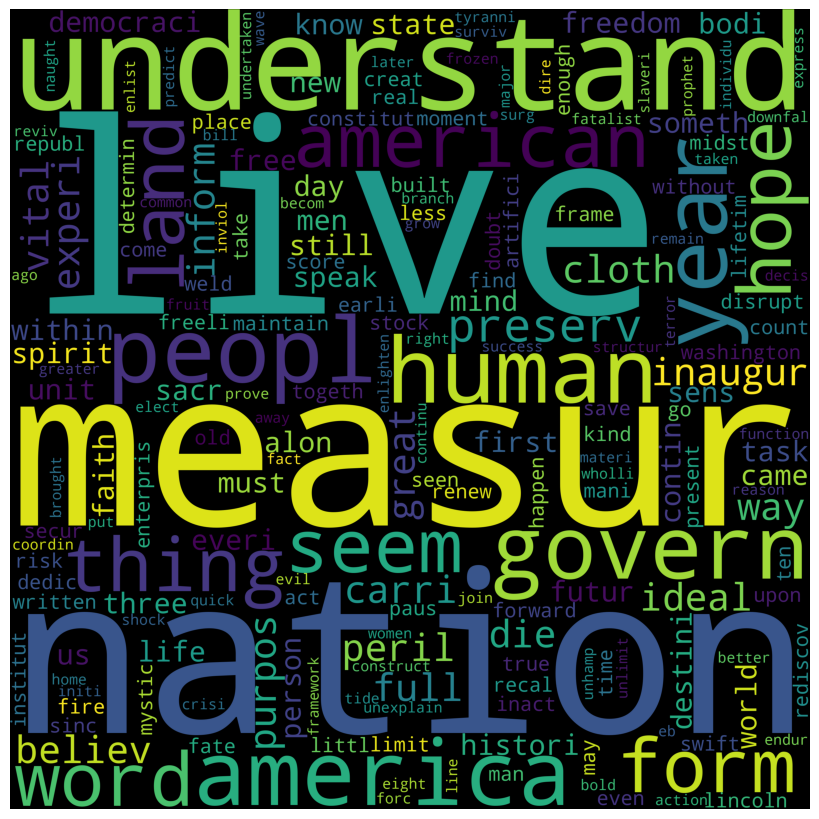

In [15]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech 1 after cleaning:")
plt.show()

In [16]:
wordcloud2 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_2)

#### Plotting the WordCloud image                        

Word Cloud for Speech 2 after cleaning:


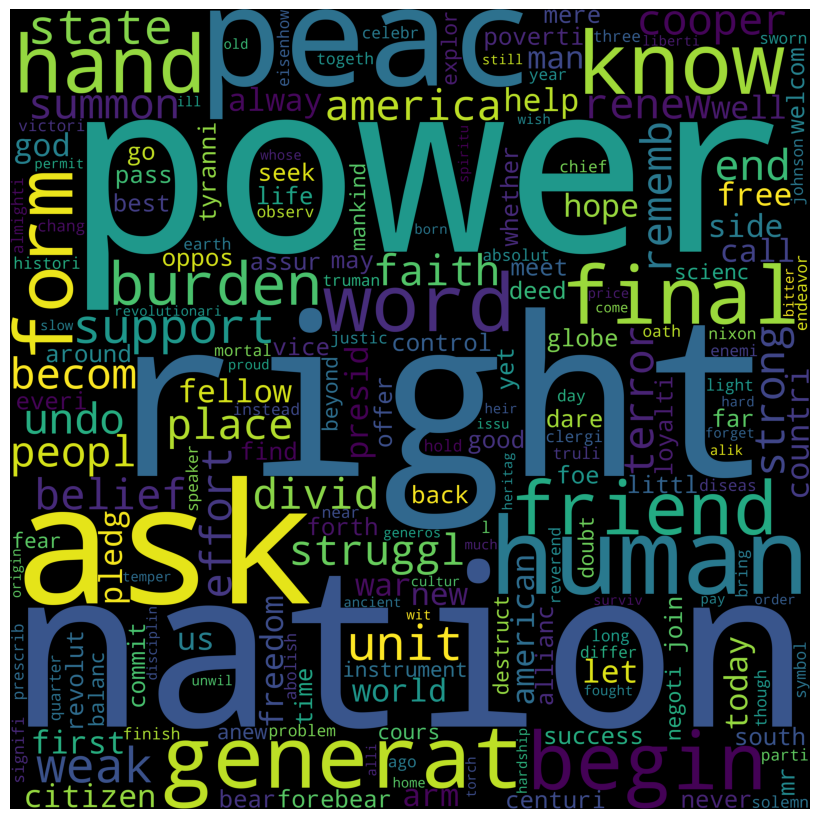

In [17]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech 2 after cleaning:")
plt.show()

In [18]:
wordcloud3 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_3)

#### Plotting the WordCloud image                        

Word Cloud for Speech 3 after cleaning:


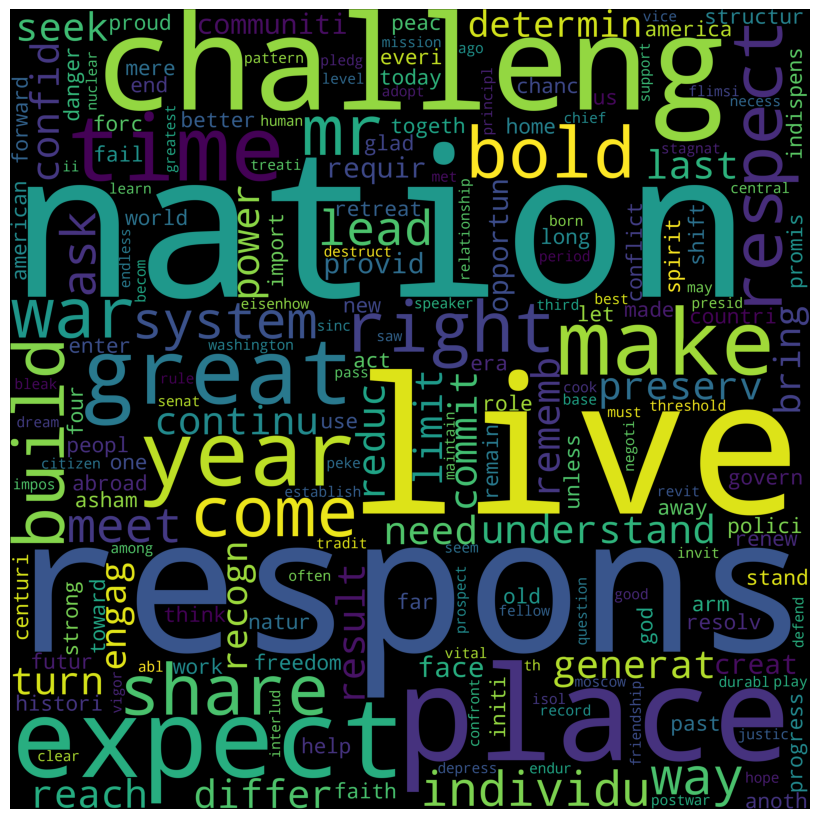

In [19]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech 3 after cleaning:")
plt.show()